In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("../input/avocado-prices/avocado.csv", index_col=0)
df.head()

Date - The date of the observation <br>
AveragePrice - the average price of a single avocado <br>
type - conventional or organic <br>
year - the year <br>
Region - the city or region of the observation <br>
Total Volume - Total number of avocados sold <br>
4046 - Total number of avocados with PLU 4046 sold <br>
4225 - Total number of avocados with PLU 4225 sold <br>
4770 - Total number of avocados with PLU 4770 sold <br>

# Colors for the plots (just to consult :)

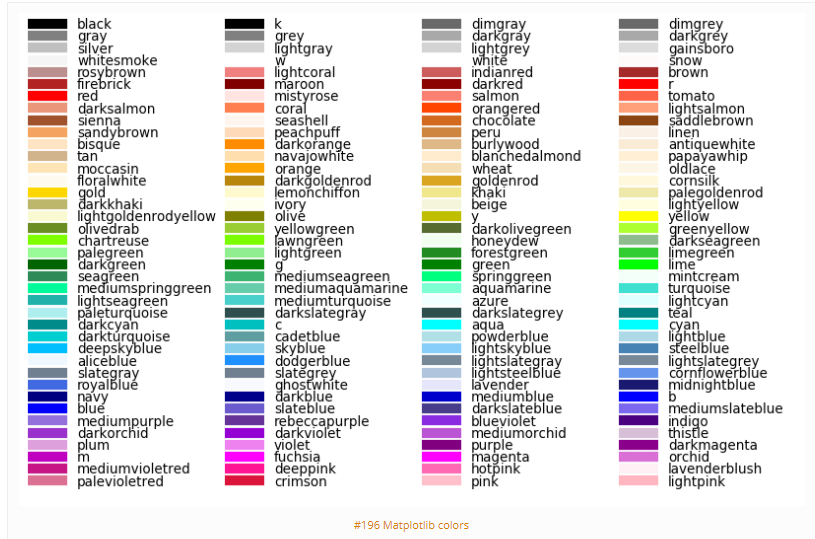

# Summary stats of the data

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df.duplicated().any()

In [ ]:
df['Month'] = pd.DatetimeIndex(df['Date']).month
df.head()

In [ ]:
print(df["AveragePrice"].mean())
print(df["AveragePrice"].min())
print(df["AveragePrice"].max())

In [ ]:
df[df["AveragePrice"] > 3.0]

In [ ]:
df.year.unique()

In [ ]:
df.region.unique()

In [ ]:
df.type.unique()

# EDA/Visualizations

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr())

# Average Price

In [ ]:
avg_per_region = df.groupby("region")["AveragePrice"].mean()
df1 = pd.DataFrame(avg_per_region)
df1 = pd.DataFrame(df1.AveragePrice.sort_values(ascending=False))
df1.head()

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x=df1.index, y=df1.AveragePrice, palette="mako")

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x="region", y="AveragePrice", data= df ,palette="mako")
sns.color_palette("rocket")

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Organic Avocado According to Region')

In [ ]:
avg_per_region_and_type = df.groupby(["type", "region"])["AveragePrice"].mean()
df2 = pd.DataFrame(avg_per_region_and_type)
df2 = pd.DataFrame(df2.AveragePrice.sort_values(ascending=False))
df2.reset_index(level=0, inplace=True)
df2.head()

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x=df2[df2["type"] == "organic"].index, y=df2[df2["type"] == "organic"]["AveragePrice"])
sns.color_palette("rocket")

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Organic Avocado According to Region')

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x=df2[df2["type"] == "conventional"].index, y=df2[df2["type"] == "conventional"]["AveragePrice"])
sns.color_palette("magma")

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Conventional Avocado According to Region')

In [ ]:
avg_per_type = df.groupby("type")["AveragePrice"].mean()
df2 = pd.DataFrame(avg_per_type)

plt.figure(figsize=(15,10))
sns.barplot(x=df2.index, y=df2.AveragePrice, palette="mako")

plt.xlabel("Type")
plt.ylabel("Average Price")
plt.title("Average Price of Avocado According to Type")

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(x="year", y="AveragePrice", marker='o', ci=None, data=df)
plt.title("Average Price According to Years")

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(x="Date", y="AveragePrice", marker='o', ci=None, data=df).set(xticklabels=[])
plt.title("Average Price According to Years")

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(x="year", y="AveragePrice", hue="type", marker='o', ci=None, data=df)
plt.title("Average Price by Type According to Years")

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(x="Month", y="AveragePrice", marker='o', ci=None, data=df)
plt.title("Average Price According to Months")

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(x="Month", y="AveragePrice", hue="type", marker='o', ci=None, data=df)
plt.title("Average Price by Type According to Months")

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(df["AveragePrice"], color="b")

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(df[df["type"] == "organic"]["AveragePrice"], color="c", label="organic")
sns.distplot(df[df["type"] == "conventional"]["AveragePrice"], color="g", label="conventional", 
             hist_kws={"alpha": 0.2})
plt.legend()

In [ ]:
df.head()

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(df["Total Volume"], color="r")

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(df[df["type"] == "organic"]["Total Volume"], color="tomato")

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(df[df["type"] == "conventional"]["Total Volume"], color="tomato")

In [ ]:
plt.figure(figsize=(15,10))
plt.title("Total volume of Avocado sold by City")
sns.barplot(x="region", y="Total Volume", data= df, palette="mako")
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(x="Date", y="Total Volume", hue="type", marker='.', ci=None, data=df).set(xticklabels=[])
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(x="year", y="Total Volume", marker='o', ci=None, data=df)

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x="year", y="Total Volume", palette="rocket", data=df)

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(x="Month", y="Total Volume", marker='o', ci=None, data=df)

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x="Month", y="Total Volume", palette="rocket", data=df)

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(x="year", y="Total Volume", hue="type", marker='o', ci=None, data=df)

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x="year", y="Total Volume", hue="type", palette="rocket", data=df)

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(x="Month", y="Total Volume", hue="type", marker='o', ci=None, data=df)

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x="Month", y="Total Volume", hue="type", palette="rocket", data=df)

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="AveragePrice", y="Total Volume", hue="type", data=df)

In [ ]:
bigvolumes = df[df["Total Volume"] > 20_000_000]
bigvolumes.head(3)

In [ ]:
bigvolumes.region.unique()

In [ ]:
bigvolumes.type.value_counts()

In [ ]:
bigvolumes.year.value_counts()

In [ ]:
print('Min:', bigvolumes.AveragePrice.min())
print('Max:', bigvolumes.AveragePrice.max())
print('Mean:', bigvolumes.AveragePrice.mean())